In [1]:
import pandas as pd
import glob
import os
pd.options.mode.chained_assignment = None 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:


# PATHS

#Den Bosch flow
path = "../data/sewer_data/data_pump/RG8150/"
path1 = "../data_pumps/sewer_data_db/data_wwtp_flow/RG1876_flow/"
path2 = "../data_pumps/sewer_data_db/data_wwtp_flow/RG1882_flow/"


#Bokhoven level
path3 = "../data/sewer_data/data_pump/RG8180_L0/"
#Bokhoven flow
path4 = "../data/sewer_data/data_pump/RG8180_Q0/"


#Haarsteeg level
path5 = "../data/sewer_data/data_pump/rg8170_N99/"
#Haarsteeg flow
path6 = "../data/sewer_data/data_pump/rg8170_99/"


#Helftheuvelweg level column 003 Helftheuvelweg *.csv
path7 = "../data/sewer_data_db/data_pump_level/"
#Helftheuvelweg flow 
path8 = "../data/sewer_data_db/data_pump_flow/1210FIT301_99/"


#Engelerschans level column “004 Engelerschans” *.csv
path9 = "../data/sewer_data_db/data_pump_level/"
#Engelerschans flow + Haarsteeg + Bokhoven, therefore substract for only Engeleschans
path10 = "../data/sewer_data_db/data_pump_flow/1210FIT201_99/"


#Maaspoort level Column: “006 Maaspoort” *.csv 
path11 = "../data/sewer_data_db/data_pump_level/"
#Maasport flow + Rompert
path12= "../data/sewer_data_db/data_pump_flow/1210FIT501_99/"


#Oude Engelenseweg level Column: “002 Oude Engelenseweg” *.csv
path13 = "../data/sewer_data_db/data_pump_level/"
#Oude Engelenseweg flow
path14 = "../data/sewer_data_db/data_pump_flow/1210FIT401_94/"


#De Rompert level Column: “005 de Rompert” *.csv
path15 = "../data/sewer_data_db/data_pump_level/"
#De Rompert flow + Maasport
path16 = "../data/sewer_data_db/data_pump_flow/1210FIT501_99/"

In [4]:
#Reading and rendering (One liner example)
#Use for example this flow data and the below rain data for Haarsteeg to experiment with visualizations
#Haarsteeg

#df = pd.concat([pd.read_csv(file) for file in glob.glob(path5)], ignore_index = True)

#df.to_csv(path5+"haarsteeg_l_comb.csv")

In [5]:
path_linkinfo = "../data/sewer_model_db"
path_rain = "../data/sewer_data/rain_timeseries"

station_names = ["Haarsteeg", "Bokhoven", "Hertogenbosch (Helftheuvelweg)", "Hertogenbosch (Rompert)"]
link = pd.read_excel(path_linkinfo+
                   "/20180717_dump riodat rioleringsdeelgebieden_DB.xlsx",skiprows=[0,1,2,3,4,5,6,7,8]
                   )

In [6]:
# #Location linkage
# path_linkinfo = "../data/waterschap-aa-en-maas_sewage_2019/sewer_model"
# path_rain = "../data/waterschap-aa-en-maas_sewage_2019/sewer_data/rain_timeseries"

# #Missing Engelerschans and RWZI Den Bosch linking streets inside the linking document(Someone revisit this please e.g @Roger)
# #Another missing thing this time in the rainfall data itself are streets in "Hertogenbosch (Oude Engelenseweg)" and in "Hertogenbosch (Maaspoort)", if you want to
# #see, plug "Hertogenbosch (Oude Engelenseweg)" or the other one in station_names to see exactly which streets are not in index
# # THIS IS SOMETHING TO REPORT AS MISSING IN OUR DELIVERABLE!!!

# station_names = ["Haarsteeg", "Bokhoven", "Hertogenbosch (Helftheuvelweg)", "Hertogenbosch (Rompert)"]
# link = pd.read_csv(path_linkinfo+
#                    "/20180717_dump riodat rioleringsdeelgebieden_matched_to_rainfall_locations.csv",
#                    header = 9)

#Street names by stations
streets = [list(link[link["Naam kern"] == name]["Naam / lokatie"]) for name in station_names]

rain = pd.concat([pd.read_csv(file, header = 2) for file in glob.glob(path_rain+"/*.*")], ignore_index = True)

#All the rain for the streets for the pump stations in order of station_names and the streets per station
#can be found in streets nested list in the same order


all_areas = rain[["Begin", "Eind"] + [i for sl in streets for i in sl]]


In [7]:
all_areas2 = pd.DataFrame()

for i in range(len(station_names)):
    all_areas2[station_names[i]] = rain[streets[i]].sum(1)

all_areas2["Begin"] =  all_areas["Begin"]
all_areas2["End"] = all_areas["Eind"]

In [8]:
# The sum of the rain at all locations
all_areas2.head()

,Haarsteeg,Bokhoven,Hertogenbosch (Helftheuvelweg),Hertogenbosch (Rompert),Begin,End
0,0.0,0.0,0.0,0.0,31-05-2018 22:00:00,31-05-2018 22:05:00
1,0.0,0.0,0.0,0.0,31-05-2018 22:05:00,31-05-2018 22:10:00
2,0.0,0.0,0.0,0.0,31-05-2018 22:10:00,31-05-2018 22:15:00
3,0.0,0.0,0.0,0.0,31-05-2018 22:15:00,31-05-2018 22:20:00
4,0.0,0.0,0.0,0.0,31-05-2018 22:20:00,31-05-2018 22:25:00


# Visualizing Rainfall over time

In [9]:
#Transforming strings to datetime objects
%timeit all_areas2["Begin"]=pd.to_datetime(all_areas2["Begin"],format='%d-%m-%Y %H:%M:%S')
%timeit all_areas2["End"]=pd.to_datetime(all_areas2["End"],format='%d-%m-%Y %H:%M:%S')

2.51 ms ± 598 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.96 ms ± 885 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
min(all_areas2['Begin'])

Timestamp('2017-12-31 23:00:00')

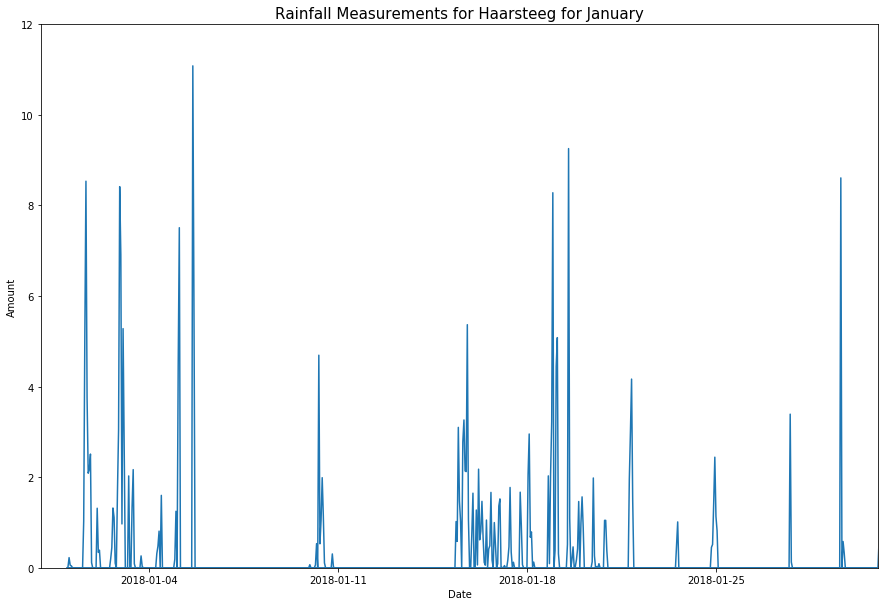

In [11]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(all_areas2['Begin'], all_areas2['Haarsteeg'])
ax1.set_xlim([datetime.date(2017, 12, 31), datetime.date(2018, 1, 31)])
ax1.set_ylim(0,12)

plt.title('Rainfall Measurements for Haarsteeg for January', fontsize = 15)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Amount', fontsize = 10);

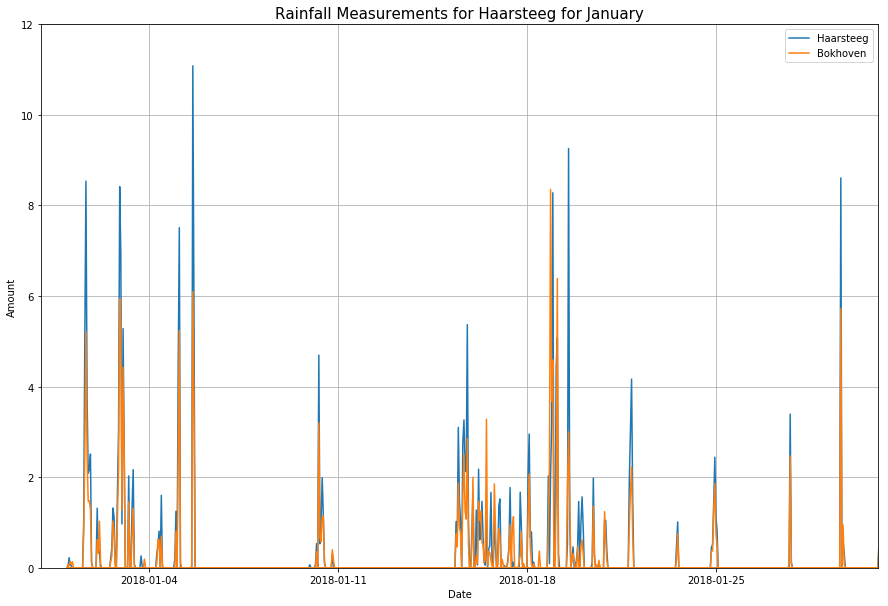

In [12]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(all_areas2['Begin'], all_areas2['Haarsteeg'], label = 'Haarsteeg')
ax1.plot(all_areas2['Begin'], all_areas2['Bokhoven'], label = 'Bokhoven')

ax1.set_xlim([datetime.date(2017, 12, 31), datetime.date(2018, 1, 31)])
ax1.set_ylim(0,12)

plt.title('Rainfall Measurements for Haarsteeg for January', fontsize = 15)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Amount', fontsize = 10)
plt.legend()
plt.grid();

C:\Users\maren\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


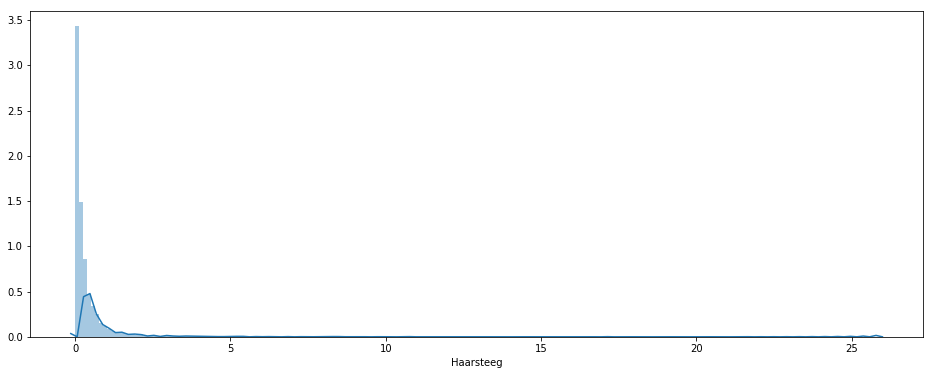

In [13]:
#Distribution of rainfall amount
plt.figure(figsize=(16, 6))
sns.distplot(all_areas2[all_areas2['Haarsteeg']!=0]['Haarsteeg'], bins = 200);

In [ ]:
#Descriptive statistics
rain_Haar = all_areas2[all_areas2['Haarsteeg'] > 0.263875]
rain_Haar.describe()